# **LOADING DATASET**

## **Importing Required Libraries and Moudles**

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder   # since I am using LabelEncoder for converting Categorical Variables into Numerical
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
train_data = pd.read_csv("taxi_train.csv")
test_data = pd.read_csv("taxi_test.csv")

# **Exploratory Data Analysis**

### **Meta Data Structure**

In [3]:
train_data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [4]:
test_data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0


Here we can observe that the target variable "total_amount" is the only difference in the train_data and test_data

We seek to identify the data types of columns in the dataset, distinguishing between numerical columns that contain quantitative values and categorical columns that represent qualitative attributes.

In [5]:
Numerical_Features = train_data.select_dtypes(include=['number']).columns
Categorical_features = train_data.select_dtypes(include=['object']).columns
print(f"Numerical Features: {Numerical_Features}")
print(f"Categorical Features: {Categorical_features}")

Numerical Features: Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee'],
      dtype='object')
Categorical Features: Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag',
       'payment_type'],
      dtype='object')


Counting whether the trip data was stored and forwarded

In [6]:
print(train_data.store_and_fwd_flag.value_counts())

N    167729
Y      1194
Name: store_and_fwd_flag, dtype: int64


### Descriptive Statistics

In [7]:
 train_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


In [8]:
test_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
count,50000.000000,48221.000000,50000.000000,48221.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,48221.000000,48221.000000
mean,0.730280,1.358309,3.999013,1.567014,132.208160,132.559300,1.918050,6.107765,0.615867,0.981354,2.255345,0.152133
std,0.444584,0.879948,78.958759,6.875115,76.483766,76.410602,1.938568,4.408572,2.289421,0.190203,0.803190,0.502866
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000409,-23.000000,-1.000000,-2.500000,-1.750000
25%,0.000000,1.000000,1.090000,1.000000,66.000000,67.000000,0.000000,3.464018,0.000000,1.000000,2.500000,0.000000
50%,1.000000,1.000000,1.850000,1.000000,132.000000,133.000000,1.000000,5.271687,0.000000,1.000000,2.500000,0.000000
75%,1.000000,1.000000,3.600000,1.000000,199.000000,199.000000,2.500000,7.504048,0.000000,1.000000,2.500000,0.000000
max,2.000000,8.000000,17624.430000,99.000000,264.000000,264.000000,11.750000,96.551343,47.750000,1.000000,2.500000,1.750000


# **Data Preprocessing**

Checking the missing or NaN values

In [9]:
 train_data.isnull().sum()    # Counting the missing values

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

Here we can observe that passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge, Airport_fee have missing values and we should impute them

### Handling the object type data

Following variables are categorical: store_and_fwd_flag, payment_type, and          these are of date-time type: tpep_pickup_datetime, tpep_dropoff_datetime

#### **Encoding Categorical Feature using Label Encoder**

Encoding the Train Data

In [10]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
train_data['store_and_fwd_flag']=label_encoder1.fit_transform(train_data['store_and_fwd_flag'])
train_data['payment_type']=label_encoder2.fit_transform(train_data['payment_type'])

Encoding the Test Data

In [11]:
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
test_data['store_and_fwd_flag']=label_encoder3.fit_transform(test_data['store_and_fwd_flag'])
test_data['payment_type']=label_encoder4.fit_transform(test_data['payment_type'])

#### **Converting the DateTime type**

I have calculated the diffrence dropoff between and pickup times and turned it into a single variable as the duration is directly proportional to total_amount

In [12]:
# calculating the duration for train data
train_data['tpep_pickup_datetime'] = pd.to_datetime(train_data['tpep_pickup_datetime'])
train_data['tpep_dropoff_datetime'] = pd.to_datetime(train_data['tpep_dropoff_datetime'])
train_data['Duration (M)'] = abs((train_data['tpep_dropoff_datetime'] - train_data['tpep_pickup_datetime']).dt.total_seconds() / 60)

In [13]:
# calculating the duration for test data
test_data['tpep_pickup_datetime'] = pd.to_datetime(test_data['tpep_pickup_datetime'])
test_data['tpep_dropoff_datetime'] = pd.to_datetime(test_data['tpep_dropoff_datetime'])
test_data['Duration (M)'] = abs((test_data['tpep_dropoff_datetime'] - test_data['tpep_pickup_datetime']).dt.total_seconds() / 60)

In [14]:
# Removing the other two variables
train_data = train_data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1)
test_data =test_data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

In [15]:
# verifying the columns of train and test data after the new column is created
train_data.head(3)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Duration (M)
0,1,1.0,2.14,1.0,0,120,9,1,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,45.600000
1,0,1.0,2.70,1.0,0,15,215,1,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,63.433333
2,1,1.0,1.15,1.0,0,167,223,1,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,53.650000


In [16]:
test_data.head(3)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,Duration (M)
0,1,1.0,4.95,1.0,0,20,3,1,1.0,6.067612,0.0,1.0,2.5,0.0,4.000000
1,1,1.0,2.10,1.0,0,9,81,1,2.5,6.191269,0.0,1.0,2.5,0.0,8.500000
2,1,1.0,0.95,1.0,0,92,90,0,2.5,3.983872,0.0,1.0,2.5,0.0,66.733333


Here we can observe that the variables tpep_pickup_datetime,tpep_dropoff_datetime are dropped and Duration (M) is created

**Now the regression task can be performed conveniently because all the features are numerical**

### **Distribution of Target Variable**

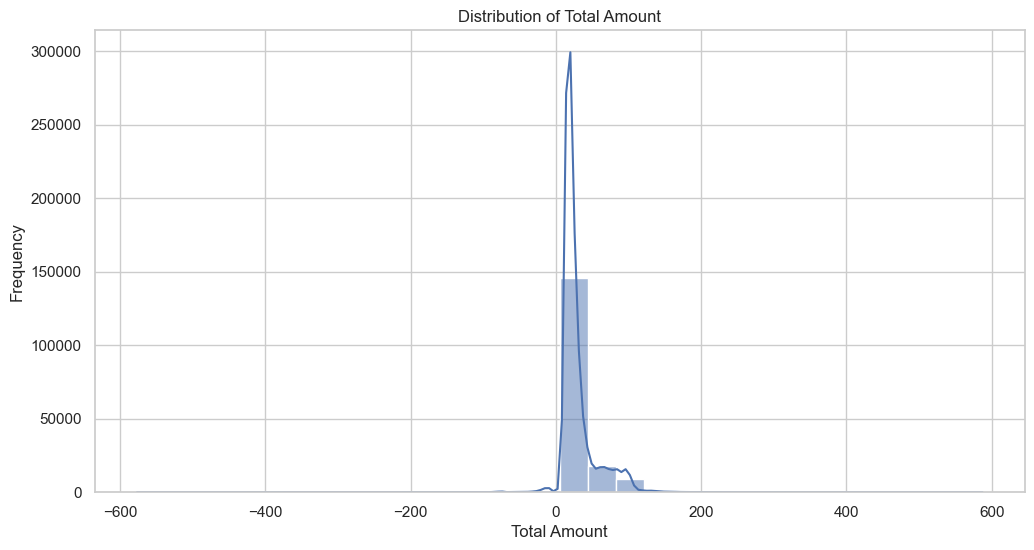

In [17]:
sns.set(style="whitegrid")
# Distribution of Total Amount
plt.figure(figsize=(12, 6))
sns.histplot(train_data['total_amount'], bins=30, kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

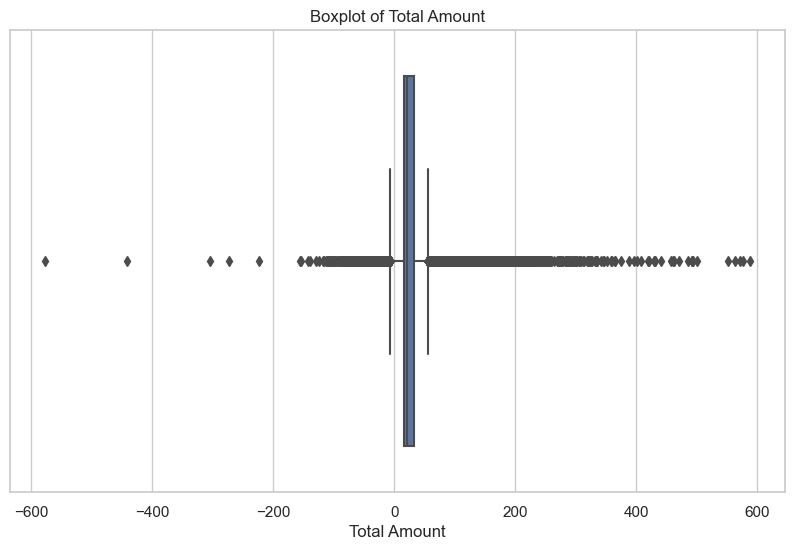

In [18]:
# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['total_amount'])
plt.title('Boxplot of Total Amount')
plt.xlabel('Total Amount')
plt.show()

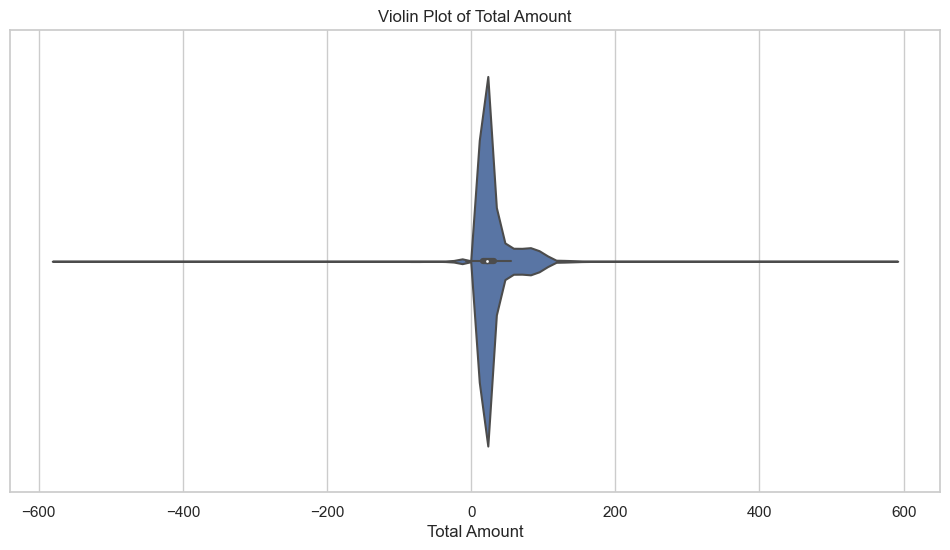

In [19]:
# Violin plot for a detailed view of the distribution
plt.figure(figsize=(12, 6))
sns.violinplot(x=train_data['total_amount'])
plt.title('Violin Plot of Total Amount')
plt.xlabel('Total Amount')
plt.show()

The data is observed as unimodal from the histogram. The data appears to be right-skewed indicating it as a positively skewed data, with a long-tail on the right side.It means that there are a few outliers with much higher fare amounts than the majority of Taxi rides.

In [20]:
Q1 = train_data['total_amount'].quantile(0.25)
Q3 = train_data['total_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying and removing outliers
outliers_index = (train_data['total_amount'] < lower_bound) | (train_data['total_amount'] > upper_bound)
cleaned_data = train_data[~outliers_index]

# the number of removed outliers
num_outliers_removed = sum(outliers_index)
print(f'Number of outliers removed: {num_outliers_removed}')

Number of outliers removed: 23479


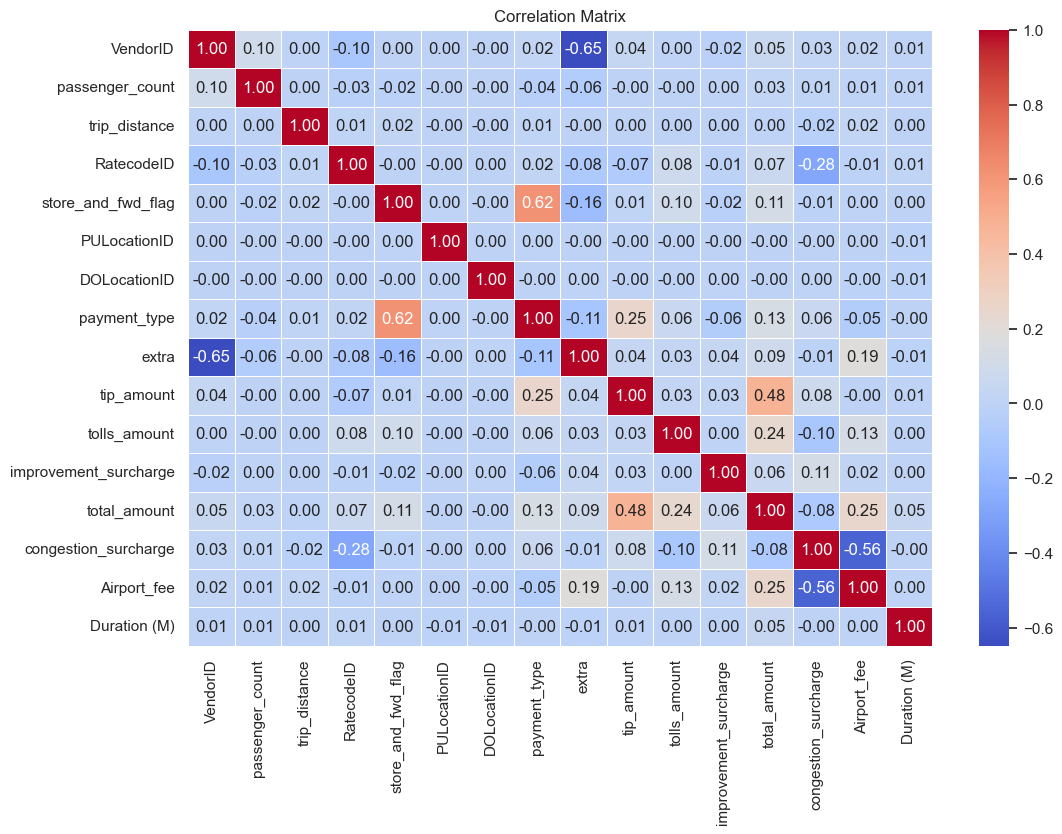

In [21]:
correlation_matrix = cleaned_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Calculate correlations between features and target variable
correlations = train_data.corr()['total_amount'].sort_values(ascending=False)
print(correlations)

total_amount             1.000000
tolls_amount             0.684765
tip_amount               0.638658
Airport_fee              0.597829
extra                    0.234346
improvement_surcharge    0.224036
Duration (M)             0.107297
RatecodeID               0.055527
passenger_count          0.053224
store_and_fwd_flag       0.043442
VendorID                 0.039695
trip_distance            0.009911
PULocationID             0.000715
DOLocationID            -0.002954
payment_type            -0.007457
congestion_surcharge    -0.147765
Name: total_amount, dtype: float64


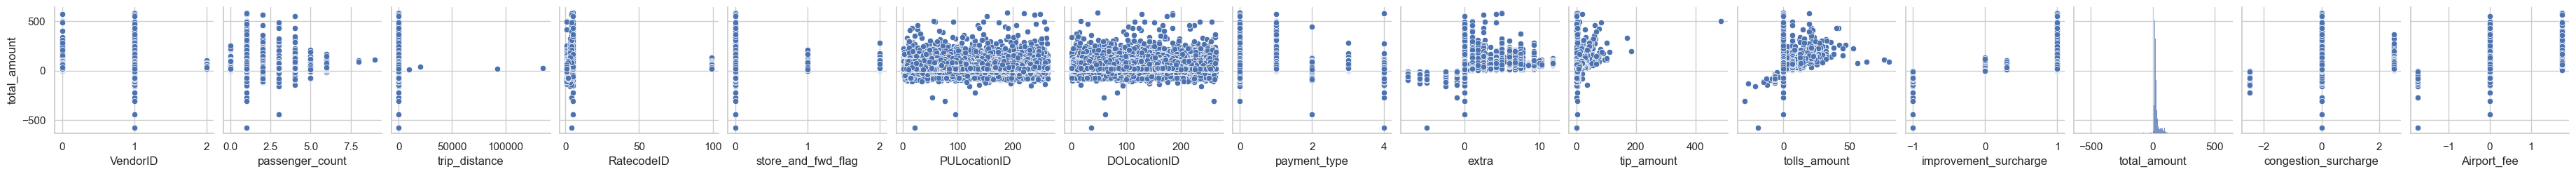

In [23]:
# Pairplot to visualize relationships between features and target variable
sns.pairplot(train_data, x_vars=train_data.columns[:-1], y_vars='total_amount', kind='scatter')
plt.show()

From the above correlation analysis we can find that the correlation coefficients between the total_amount and various features highlight strong positive relationships with tolls_amount, tip_amount, and Airport_fee, suggesting higher values lead to increased total amounts. Conversely, congestion_surcharge shows a negative correlation. Other features exhibit weak correlations, influencing the total amount to a lesser extent.


# Train-Test Splitting

In [24]:
X_train = train_data.drop(['total_amount'], axis=1)
y_train = train_data['total_amount']

In [25]:
# Spliting the training data into a training set and cross validation set
X_train_split, X_validation, y_train_split, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=27)

## Transformation of Data using ColumnTransformer and Pipelines

In [26]:
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
# Creating a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features)
    ])

# Applying the transformations to the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Applying the transformations to the training and validation sets after split
X_train_split_transformed = preprocessor.transform(X_train_split)
X_validation_transformed = preprocessor.transform(X_validation)

# ML Model Building

#### Linear Regression Model

In [27]:
linear_model = LinearRegression()

# Fit the model on the training split
linear_model.fit(X_train_split_transformed, y_train_split)

# Evaluate on the validation set
y_pred_linear_validation = linear_model.predict(X_validation_transformed)
r2_linear_validation = r2_score(y_validation, y_pred_linear_validation)

# Print the R^2 score on the validation set
print("R^2 score on validation set (Linear Regression):", r2_linear_validation)

R^2 score on validation set (Linear Regression): 0.7253350444023177


#### Ridge Regression Model

In [28]:
ridge_model = Ridge(max_iter=1000)

# Hyperparameter tuning for Ridge
param_grid_ridge = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 10]
}

grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

grid_search_ridge.fit(X_train_split_transformed, y_train_split)

# Getting the best model
best_model_ridge = grid_search_ridge.best_estimator_

# Get the best hyperparameters
best_params_ridge = grid_search_ridge.best_params_

# Evaluate on the validation set
y_pred_ridge_validation = best_model_ridge.predict(X_validation_transformed)
r2_ridge_validation = r2_score(y_validation, y_pred_ridge_validation)

# Print the best hyperparameters
print("Best hyperparameters for Ridge Regression:", best_params_ridge)

# Print the R^2 score on the validation set
print("R^2 score on validation set (Ridge Regression):", r2_ridge_validation)

Best hyperparameters for Ridge Regression: {'alpha': 10}
R^2 score on validation set (Ridge Regression): 0.7253347571088729


#### Lasso Regression Model

In [29]:
lasso_model = Lasso(max_iter=1000)

# Hyperparameter tuning for Lasso
param_grid_lasso = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 10]
}

grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

grid_search_lasso.fit(X_train_split_transformed, y_train_split)

# Best model
best_model_lasso = grid_search_lasso.best_estimator_

# Best hyperparameters
best_params_lasso = grid_search_lasso.best_params_

# Evaluating on the validation set
y_pred_lasso_validation = best_model_lasso.predict(X_validation_transformed)
r2_lasso_validation = r2_score(y_validation, y_pred_lasso_validation)

# Printing the best hyperparameters
print("Best hyperparameters for Lasso Regression:", best_params_lasso)

# Print the R^2 score on the validation set
print("R^2 score on validation set (Lasso Regression):", r2_lasso_validation)

Best hyperparameters for Lasso Regression: {'alpha': 0.1}
R^2 score on validation set (Lasso Regression): 0.7250720210462143


#### Decision Tree Regressor Model

In [30]:
tree_model = DecisionTreeRegressor(random_state=42)

# Define hyperparameters and their ranges for DecisionTreeRegressor
param_grid_tree = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, cv=5, scoring='neg_mean_squared_error')

# Fitting the model on the training split
grid_search_tree.fit(X_train_split_transformed, y_train_split)

# Best model
best_model_tree = grid_search_tree.best_estimator_

# Best hyperparameters
best_params_tree = grid_search_tree.best_params_

# Evaluation on the validation set
y_pred_tree_validation = best_model_tree.predict(X_validation_transformed)
r2_tree_validation = r2_score(y_validation, y_pred_tree_validation)

# Printing the best hyperparameters
print("Best hyperparameters for Decision Tree Regressor:", best_params_tree)

# Printing the R^2 score on the validation set
print("R^2 score on validation set (Decision Tree Regressor):", r2_tree_validation)

Best hyperparameters for Decision Tree Regressor: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
R^2 score on validation set (Decision Tree Regressor): 0.8716597313330822


XGB Regressor

In [31]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model on the training set
xgb_model.fit(X_train_split_transformed, y_train_split)

# Predict on the validation set
y_pred_xgb_validation = xgb_model.predict(X_validation_transformed)

# Calculate R^2 score on the validation set
r2_xgb_validation = r2_score(y_validation, y_pred_xgb_validation)

# Print the R^2 score
print("R^2 score on validation set (XGBoost Regressor):", r2_xgb_validation)

R^2 score on validation set (XGBoost Regressor): 0.9300788729455123


### Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Instantiate the model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters and their ranges for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Setting up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Fitting the model on the training data
grid_search_rf.fit(X_train_split_transformed, y_train_split)

# Best model
best_model_rf = grid_search_rf.best_estimator_

# Best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Evaluation on the validation set
y_pred_rf_validation = best_model_rf.predict(X_validation_transformed)
r2_rf_validation = r2_score(y_validation, y_pred_rf_validation)

# Printing the best hyperparameters and R^2 score
print("Best hyperparameters for Random Forest Regressor:", best_params_rf)
print("R^2 score on validation set (Random Forest Regressor):", r2_rf_validation)


Best hyperparameters for Random Forest Regressor: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
R^2 score on validation set (Random Forest Regressor): 0.9301515896860747


## Prediction on test_data

In [28]:
X_test_transformed = preprocessor.transform(test_data)
y_pred = best_model_rf.predict(X_test_transformed)
y_pred

array([36.10541783, 26.27656219, 17.28026174, ..., 20.55657603,
       37.18228129, 18.1405808 ])

## Output.csv submission

In [ ]:
submission = pd.DataFrame(columns = ["ID","total_amount"])
submission["ID"] = [i for i in range(1,len(y_pred)+1)]
submission["total_amount"] = y_pred
submission.to_csv('submission.csv',index=False)
submission

In the first submission of the project, a comprehensive exploration of regression models, including linear, Lasso, Ridge,and Decision Tree Regressor, was undertaken. Subsequent submissions will extend the analysis to encompass additional models such as RandomForest Regressor, XGB Regressor, and Gradient Boost Regressor, thereby providing a more extensive evaluation of regression techniques for the given problem statement.